In [1]:
#When output variable is not categorical, regression is to be used : Check for Linear regression when correlation b/w input&output > 80%
#Dataset : petrol_consumption.csv
#location : https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [4]:
x = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [5]:
x.corrwith(y) #corr < 80% in all cases, hence linear regression can't be used, non-linear regression can be used like decison tree regression

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

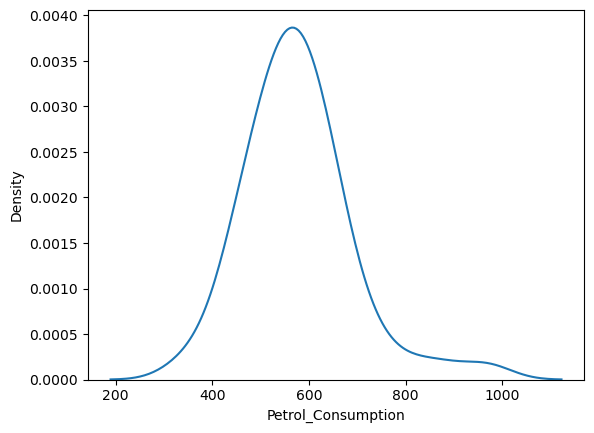

In [6]:
sns.kdeplot(y) #output variable is continuous, not classifiable

In [7]:
x.describe() #ranges of input variables is largely varying, hence scaling/normalizing is required

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333
std,0.950770,573.623768,3491.507166,0.055470
min,5.000000,3063.000000,431.000000,0.451000
25%,7.000000,3739.000000,3110.250000,0.529750
50%,7.500000,4298.000000,4735.500000,0.564500
75%,8.125000,4578.750000,7156.000000,0.595250
max,10.000000,5342.000000,17782.000000,0.724000


Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,48.000000,48.000000,48.000000,48.000000
mean,0.533667,0.517259,0.295915,0.437118
std,0.190154,0.251700,0.201228,0.203188
min,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.296621,0.154415,0.288462
50%,0.500000,0.541904,0.248084,0.415751
75%,0.625000,0.665094,0.387586,0.528388
max,1.000000,1.000000,1.000000,1.000000


Cross Validation

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 0)

In [10]:
x_train.shape, x_test.shape

((36, 4), (12, 4))

Build the model

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
#train the algorithm
regressor.fit(x_train,y_train) 

DecisionTreeRegressor(random_state=0)

Performance Evaluation

In [12]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame([['Actual', y_test],['Predicted', y_pred]])
result

,0,1
0,Actual,29 534 4 410 26 577 30 571 32 ...
1,Predicted,"[541.0, 510.0, 628.0, 628.0, 628.0, 644.0, 628..."


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [14]:
mean_absolute_error(y_test,y_pred)

65.25

In [15]:
mean_absolute_percentage_error(y_test,y_pred)

0.12363096331987156

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

75.3077021293307

Visualization

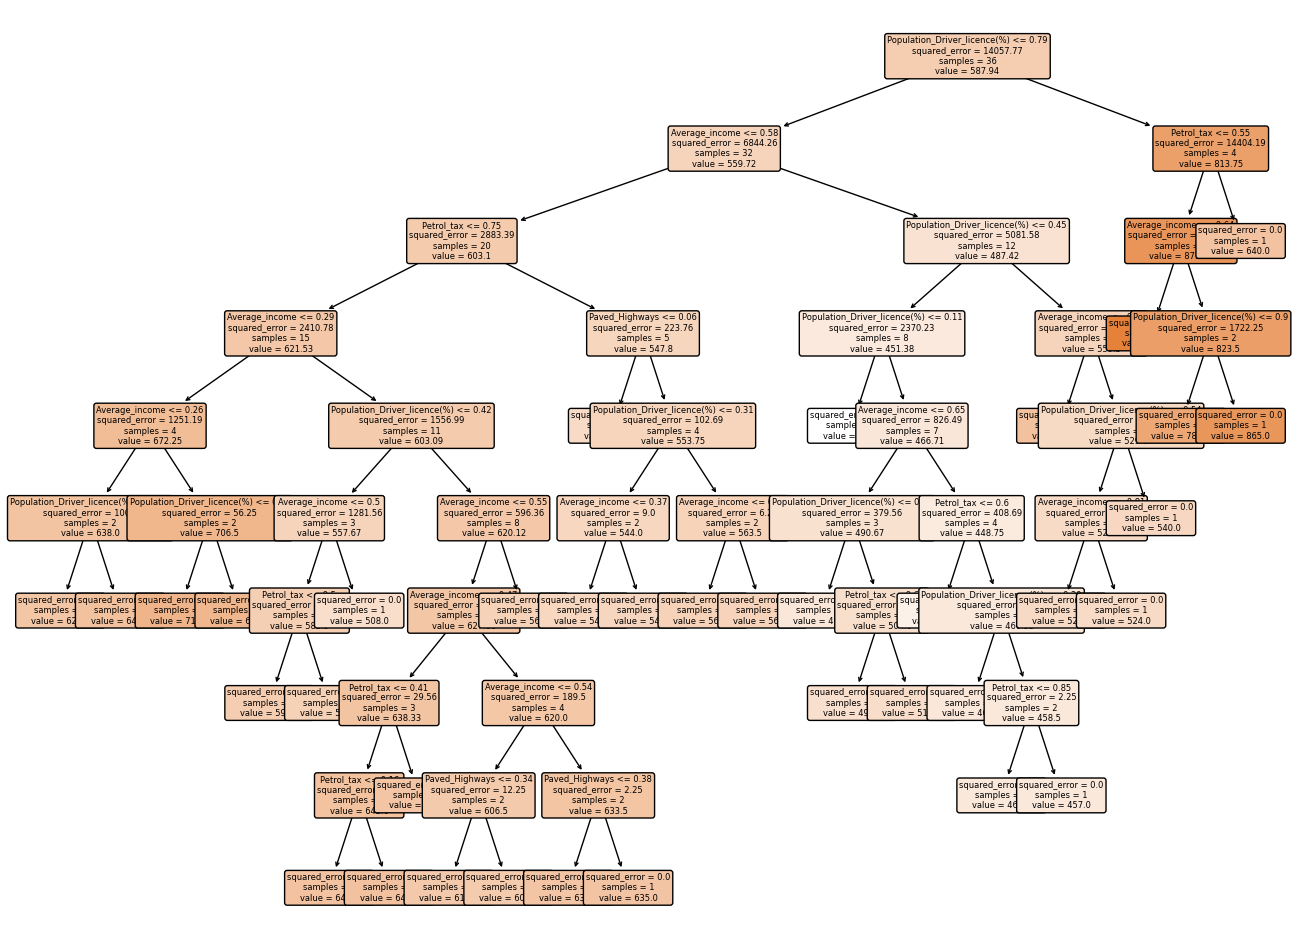

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,12))
plot_tree(regressor, fontsize=6, feature_names=x.columns, filled=True, precision=2, rounded=True);
plt.savefig('petrol_tree.png')

<BarContainer object of 4 artists>

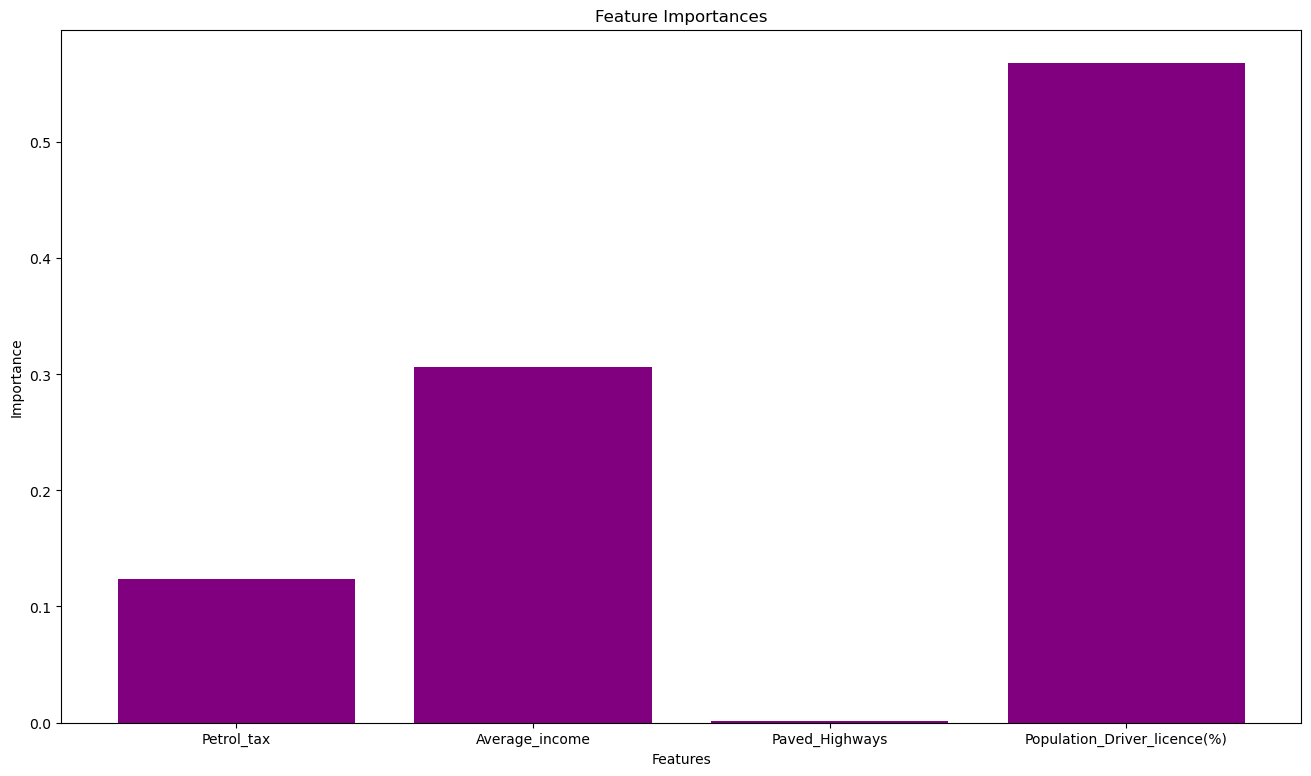

In [18]:
plt.figure(figsize=(16,9))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, regressor.feature_importances_, color='purple')

In [19]:
new = pd.DataFrame(data = [[7.3, 4449, 4639, 0.626],
                           [6.4, 5215, 2302, 0.672]],
                   columns = x.columns)
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,7.3,4449,4639,0.626
1,6.4,5215,2302,0.672


In [27]:
new_scaled = scaler.fit_transform(new)
pd.DataFrame(new_scaled).describe()

,0,1,2,3
count,2.000000,2.000000,2.000000,2.000000
mean,0.500000,0.500000,0.500000,0.500000
std,0.707107,0.707107,0.707107,0.707107
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000


In [28]:
petro = regressor.predict(new_scaled)
petro

array([541., 865.])

In [30]:
regressor.feature_importances_ * 100 

array([12.36150682, 30.64515438,  0.14563906, 56.84769974])